### Table of Contents
- A Simple Example
- Parts of a Figure
- Types of inputs to plotting functions
- Coding styles
    - The explicit and the implicit interfaces
    - Making a helper functions
- Styling Artists
    - Colors
    - Linewidths, linestyles, and markersizes
- Labelling plots
    - Axes labels and text
    - Using mathematical expressions in text
    - Annotations
    - Legends
- Axis scales and ticks
    - Scales
    - Tick locators and formatters
    - Plotting dates and strings
    - Additional Axis objects
- Color mapped data
    - Colormaps
    - Normalizations
    - Colorbars
- Working with multiple Figures and Axes
- More reading

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

add `;` at the end of lines so that it doesn't show you redundant text info

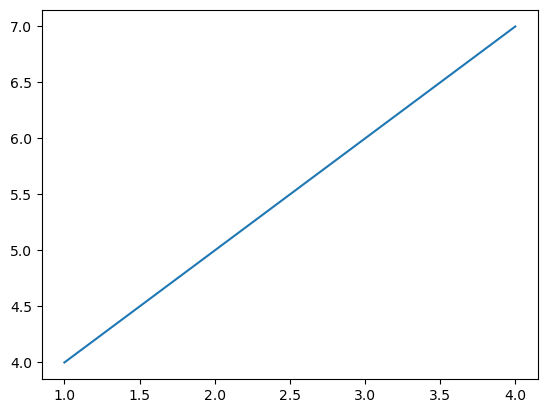

In [3]:
fig, ax = plt.subplots()
ax.plot(
    [1, 2, 3, 4],
    [4, 5 ,6 ,7],
);

## Parts of Figure

https://raw.githubusercontent.com/pytopia/ML/4ed06f151b74cdb0e372167aaf3c63654ddfb1af/Machine%20Learning/04.%20Data%20Visualization/images/anatomy.webp

## Figure

In [4]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

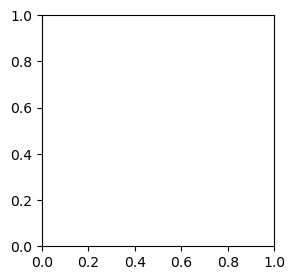

In [5]:
fig, ax = plt.subplots(figsize=(3, 3));

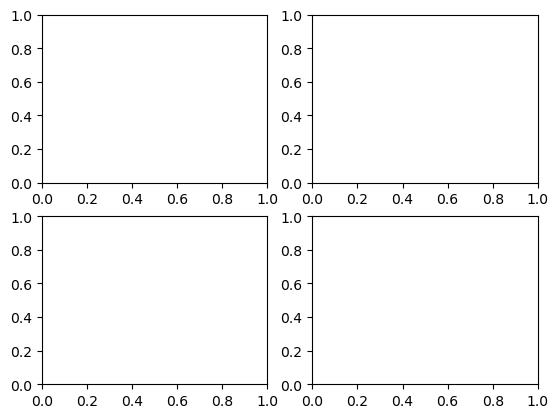

In [6]:
fig, axs = plt.subplots(2, 2,);

## Axes

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two Axis objects (be aware of the difference between Axes and Axis)

## Axis

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks)

## Artist

There are three layers to the Matplotlib API.

- the `matplotlib.backend_bases.FigureCanvas` is the area onto which the figure is drawn
- the `matplotlib.backend_bases.Renderer` is the object which knows how to draw on the FigureCanvas
- and the `matplotlib.artist.Artist` is the object that knows how to use a renderer to paint onto the canvas.

<br> <br>
___

### Types of inputs to plotting functions


In [7]:
np.random.seed(19680801)

# Generate data
data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)
}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100


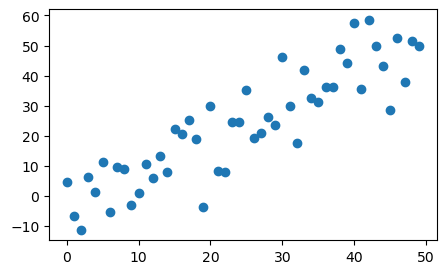

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter('a', 'b', data=data) # you could also do this --> ax.scatter(data['a'], data['b'])

Text(0, 0.5, 'y')

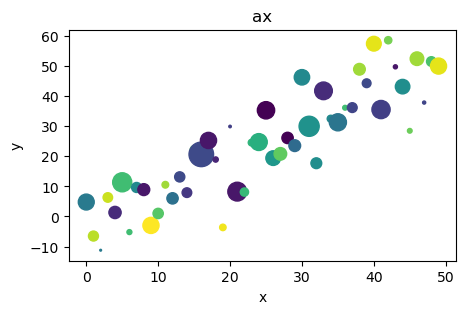

In [9]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter('a', 'b', c='c' ,s='d', data=data, )  # in this example, c is refered to color of each point
ax.set_title('ax')
ax.set_xlabel('x')
ax.set_ylabel('y')

___

`layout='constrained'`

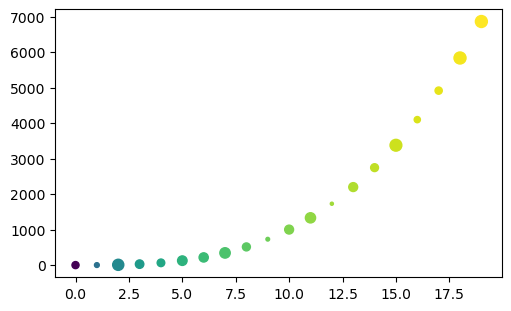

In [10]:
sample_size = 20
x = np.arange(sample_size)
y = np.power(x, 3)
c = np.power(x, 1/3)
s = np.random.randint(1, 80, size=sample_size)

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
ax.scatter(
    x=x,
    y=y,
    s=s,
    c=c,
)

## Coding Styles

- **Explicitly** create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to **implicitly** create and manage the Figures and Axes, and use pyplot functions for plotting.

In [11]:
x = np.linspace(0, 2, 100)

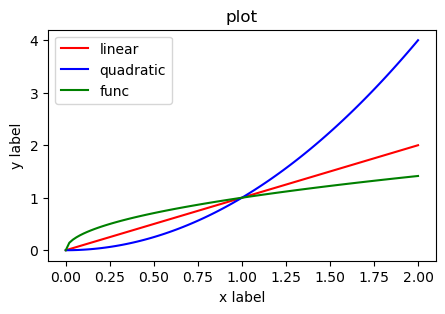

In [12]:
## OO style
fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(x, x, color='red', label='linear')
plt.plot(x, x**2, color='blue', label='quadratic')
plt.plot(x, x**(1/2), color='green', label='func')

ax.set( # you can also set attributes like this
    xlabel='x label',
    ylabel='y label',    
    title='plot'
)

ax.legend() # you should set label for plots if you want to set legend

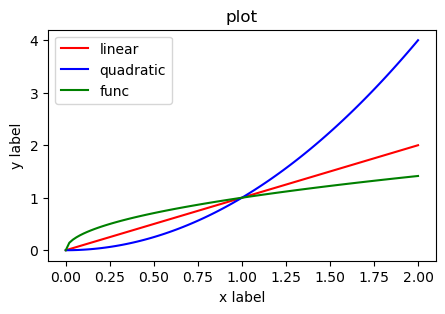

In [13]:
## pyplot style
plt.figure(figsize=(5, 3))
plt.plot(x, x, color='red', label='linear')
plt.plot(x, x**2, color='blue', label='quadratic')
plt.plot(x, x**(1/2), color='green', label='func')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('plot')

plt.legend();

## Making helper function

If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

In [14]:
def plotter(x, y, **kwargs) :
    plt.figure(figsize=(5, 3))
    out = plt.plot(x, y, **kwargs)
    return out

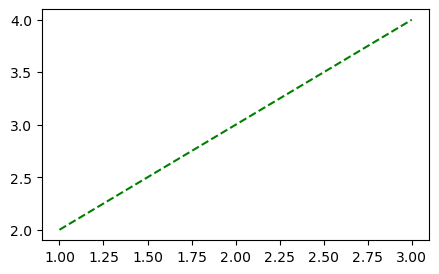

In [15]:
plotter([1, 2, 3], [2, 3, 4], color='green', linestyle='--')

## Styling Artists

Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a **"setter"** on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle.

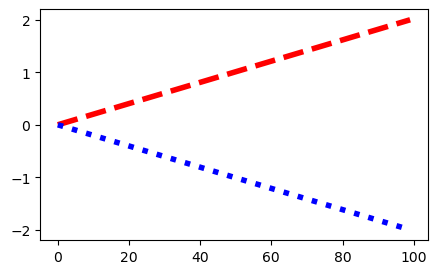

In [16]:
fig, ax = plt.subplots(figsize=(5, 3))
# giving attributes at the plot arguments
ax.plot(x, color='red', linestyle='--', linewidth=4)

# giving attributes seperatly
l, = ax.plot(-x)
l.set_color('blue')
l.set_linestyle('dotted')
l.set_linewidth(4)

___

### colors

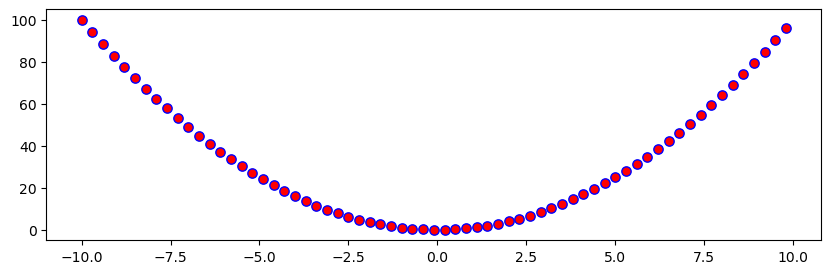

In [83]:
x = np.arange(-10, 10, 0.3)
fig, ax = plt.subplots(figsize=(10, 3))
ax.scatter(x, x**2, facecolor='red', edgecolor='blue', s=45)


another example :
<br>

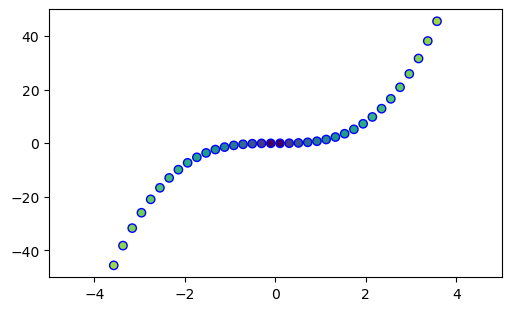

In [4]:
x = np.linspace(-5, 5, 50)
y = x**3
s = np.random.randint(-5, 50, size=50)
c = np.concatenate([np.power(abs(x), 1/3)[:50],
               -1*np.power(abs(x), 1/3)[50:75]]);

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
ax.scatter(x=x, y=y, c=c,
            edgecolors='blue', marker='o', linewidth=1)

ax.set_xlim(-5, 5)
ax.set_ylim(-50, 50);

### linewidths, linestyles, and markersize

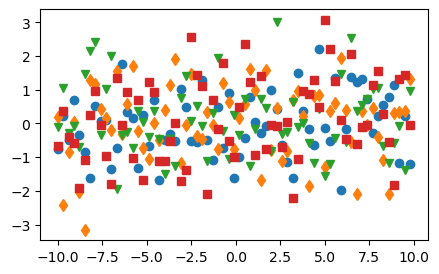

In [101]:
x = np.arange(-10, 10, 0.3)
sample_size = len(x)
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, np.random.randn(sample_size), 'o')
ax.plot(x, np.random.randn(sample_size), 'd')
ax.plot(x, np.random.randn(sample_size), 'v')
ax.plot(x, np.random.randn(sample_size), 's')

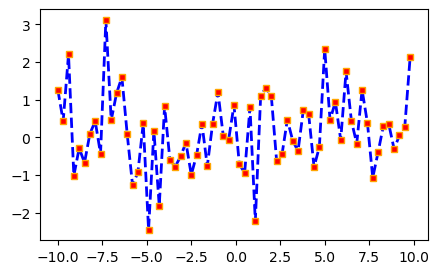

In [144]:
x = np.arange(-10, 10, 0.3)
sample_size = len(x)
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x, np.random.randn(sample_size), marker='s', markersize=5, linestyle='--', linewidth=2,
        color='blue', markerfacecolor='red', markeredgecolor='orange')

## Labelling plots

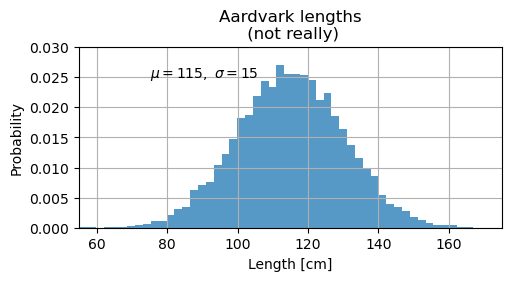

In [ ]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

___

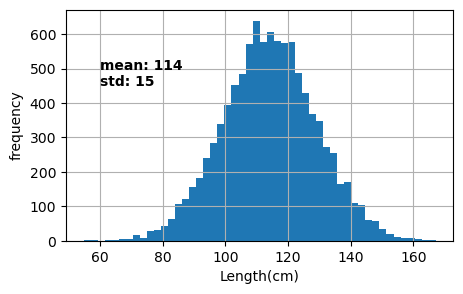

In [227]:
fig, ax = plt.subplots(figsize=(5, 3))
sample_size = 10000
mean = 114
std = 15
x = np.random.normal(mean, std, sample_size, )
ax.hist(x, bins=50, facecolor='C0')
ax.set(
    label='Normal\nDistribution',
    xlabel='Length(cm)',
    ylabel='frequency',
)
plt.text(60, 450 ,f"mean: {mean}\nstd: {std}", color='black', weight='bold')
plt.grid()

### using mathematical expressions in text

Text(6, 2, '$sigma=1.5$')

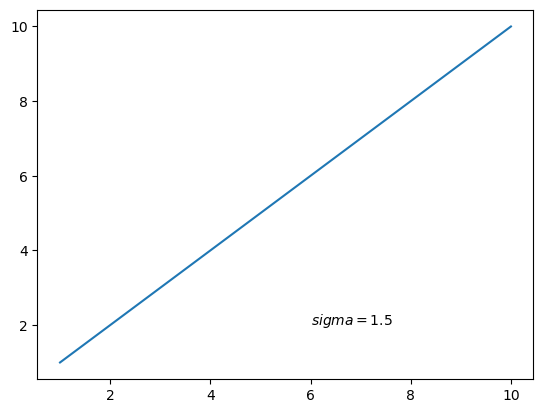

In [247]:
fig, ax = plt.subplots()
ax.plot([1, 10], [1, 10])
plt.text(6, 2, "$sigma=1.5$")

### Annotations

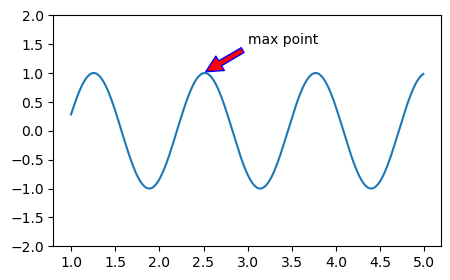

In [289]:
x = np.arange(1, 5, 0.01)
y = np.cos(5*x)
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_ylim(-2, 2)
ax.annotate('max point', xy=(2.5, 1), xytext=(3, 1.5),arrowprops=dict(facecolor='red', edgecolor='blue', shrink=0.05))
ax.plot(x, y)

array([ 0.54030231,  0.36235775,  0.16996714, -0.02919952, -0.22720209,
       -0.41614684, -0.58850112, -0.73739372, -0.85688875, -0.94222234,
       -0.9899925 , -0.99829478, -0.96679819, -0.89675842, -0.79096771,
       -0.65364362, -0.49026082, -0.30733287, -0.11215253,  0.08749898,
        0.28366219,  0.46851667,  0.63469288,  0.77556588,  0.88551952,
        0.96017029,  0.9965421 ,  0.99318492,  0.95023259,  0.86939749,
        0.75390225,  0.60835131,  0.43854733,  0.25125984,  0.05395542,
       -0.14550003, -0.33915486, -0.51928865, -0.67872005, -0.81109301,
       -0.91113026, -0.97484362, -0.99969304, -0.98468786, -0.93042627])

### Legend

we already saw how to use it. the important point is to deffine **lable** for your plots

### Scales

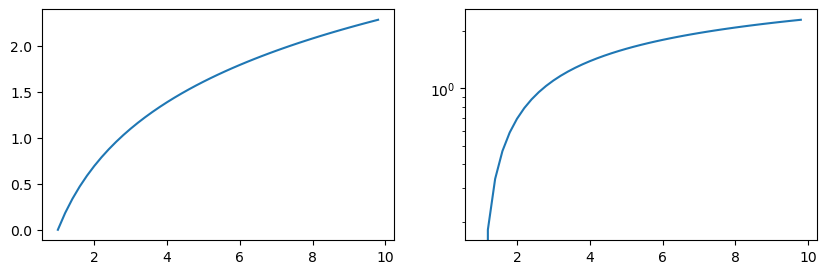

In [302]:
x = np.arange(1, 10, 0.2)
y = np.log(x)
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# first plot
axs[0].plot(x, y)
# second plot
axs[1].plot(x, y)
axs[1].set_yscale('log')

### Tick locators and formatters

Text(0.5, 1.0, 'Manual ticks')

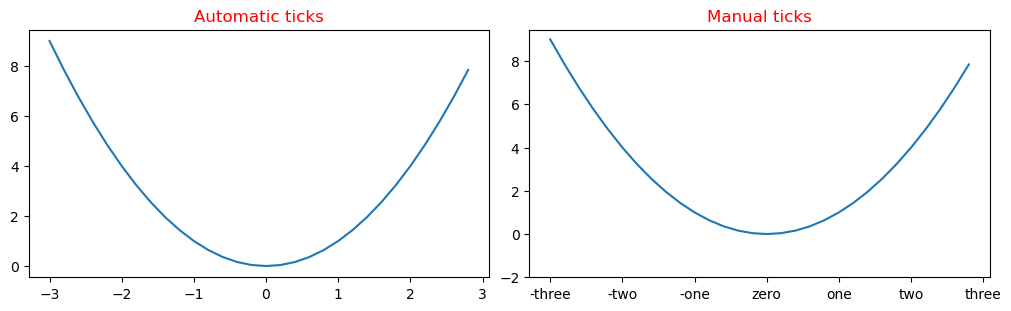

In [328]:
x = np.arange(-3, 3, 0.2)
y = x**2

fig, axs = plt.subplots(1, 2, figsize=(10, 3), layout='constrained')
axs[0].plot(x, y)
axs[0].set_title('Automatic ticks', color='red')

axs[1].plot(x, y)
axs[1].set_xticks(np.arange(-3, 4, 1), ['-three', '-two', '-one', 'zero', 'one', 'two', 'three']);
axs[1].set_yticks([-2, 0, 2, 4, 6, 8])
axs[1].set_title('Manual ticks', color='red')

### Additional Axis objects

`twinx`<br>
Plotting data of different magnitude in one chart may require an additional y-axis. Such an Axis can be created by using twinx to add a new Axes with an invisible x-axis and a y-axis positioned at the right (analogously for twiny)

Text(0.5, 0, ':)')

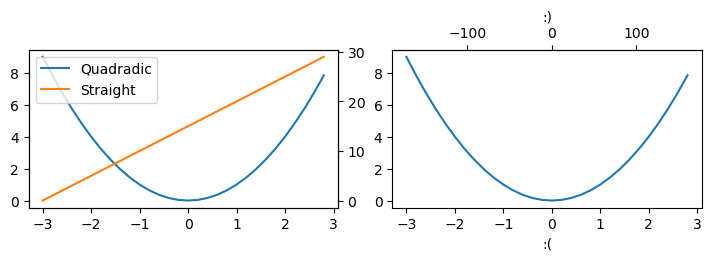

In [343]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.5), layout="constrained")
l1, = ax1.plot(x, y)

ax2 = ax1.twinx()
l2, = ax2.plot(x, range(len(x)), 'C1')
ax2.legend([l1, l2], ['Quadradic', 'Straight'])

ax3.plot(x, y)
ax3.set_xlabel(':(')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel(':)')

### Color Mapped data

Text(0.5, 1.0, 'scatter()')

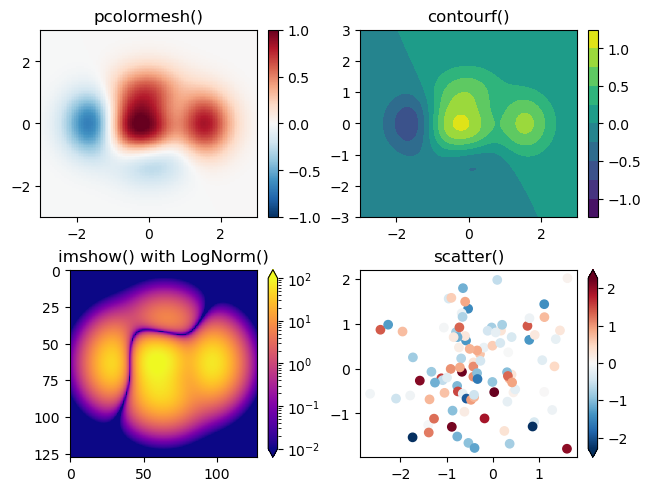

In [348]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

### Colormaps

These are all examples of Artists that derive from ScalarMappable objects. They all can set a linear mapping between vmin and vmax into the colormap specified by cmap. Matplotlib has many colormaps to choose from (Choosing Colormaps in Matplotlib) you can make your own (Creating Colormaps in Matplotlib) or download as third-party packages.

### Normalizations

Sometimes we want a non-linear mapping of the data to the colormap, as in the LogNorm example above. We do this by supplying the ScalarMappable with the norm argument instead of vmin and vmax. More normalizations are shown at Colormap Normalization.

### Colorbars

Adding a colorbar gives a key to relate the color back to the underlying data. Colorbars are figure-level Artists, and are attached to a ScalarMappable (where they get their information about the norm and colormap) and usually steal space from a parent Axes. Placement of colorbars can be complex: see Placing Colorbars for details. You can also change the appearance of colorbars with the extend keyword to add arrows to the ends, and shrink and aspect to control the size. Finally, the colorbar will have default locators and formatters appropriate to the norm. These can be changed as for other Axis objects.

### Working with multiple Figures and Axes

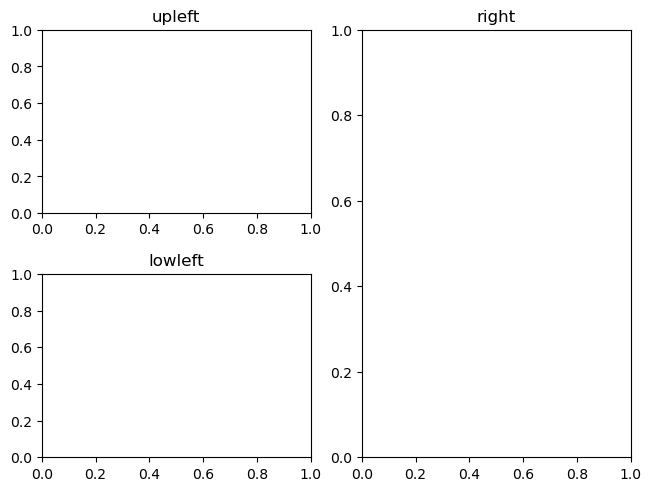

In [352]:
fig, axd = plt.subplot_mosaic(
    [
        ['upleft', 'right'],
        ['lowleft', 'right']
    ],
    layout='constrained'
)
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');

### Saving Our Plot


```python
fig.savefig(
    'file.png',
    transparent=False,
    dpi=80,
    bbox_inches='tight'
    
```


## Working with Images

In [355]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [358]:
img = mpimg.imread('IMG_20190521_223928_948.jpg')
img

array([[[27, 35, 54],
        [27, 35, 54],
        [27, 35, 54],
        ...,
        [27, 35, 54],
        [27, 35, 54],
        [27, 35, 54]],

       [[27, 35, 54],
        [27, 35, 54],
        [27, 35, 54],
        ...,
        [27, 35, 54],
        [27, 35, 54],
        [27, 35, 54]],

       [[27, 35, 54],
        [27, 35, 54],
        [27, 35, 54],
        ...,
        [27, 35, 54],
        [27, 35, 54],
        [27, 35, 54]],

       ...,

       [[27, 35, 54],
        [27, 35, 54],
        [27, 35, 54],
        ...,
        [27, 35, 54],
        [27, 35, 54],
        [27, 35, 54]],

       [[27, 35, 54],
        [27, 35, 54],
        [27, 35, 54],
        ...,
        [27, 35, 54],
        [27, 35, 54],
        [27, 35, 54]],

       [[27, 35, 54],
        [27, 35, 54],
        [27, 35, 54],
        ...,
        [27, 35, 54],
        [27, 35, 54],
        [27, 35, 54]]], dtype=uint8)

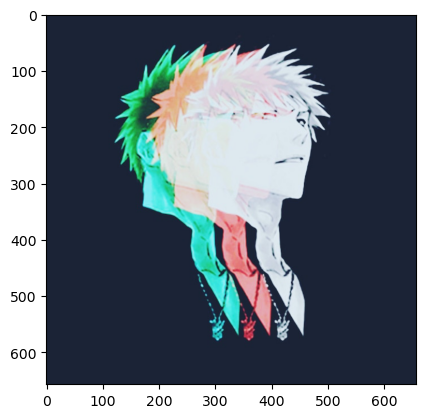

In [359]:
imgplot = plt.imshow(img)

In [360]:
img.shape

(657, 657, 3)

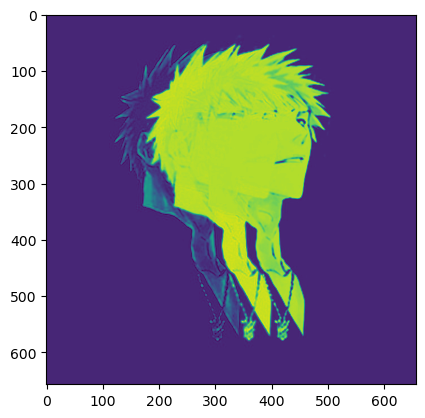

In [363]:
plt.imshow(img[:, :, 0])

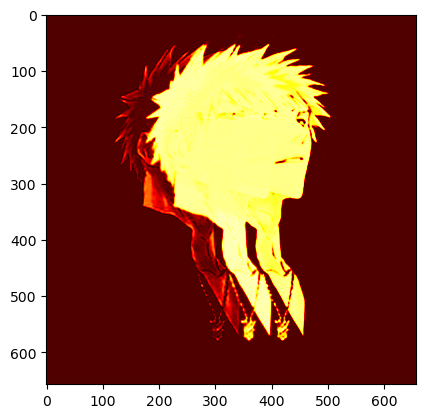

In [376]:
plt.imshow(img[:, :, 0], cmap='hot')

### color scale reerence

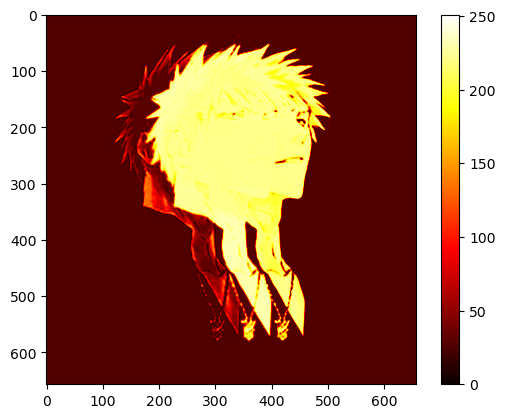

In [377]:
plt.imshow(img[:, :, 0], cmap='hot')
plt.colorbar()

### Array interplation schemes